In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Data/train_age_dataset.csv')
len(train)

488877

In [3]:
test = pd.read_csv('Data/test_age_dataset.csv')
len(test)

54320

In [4]:
sample = pd.read_csv('Data/sample_submission.csv')
sample.head()

,prediction
0,1
1,1
2,1
3,1
4,1


## Cleaning

In [5]:
train.isnull().sum()

Unnamed: 0                         0
userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
d

In [6]:
test.isnull().sum()

Unnamed: 0                         0
userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
dtype: int64

# WHY ARE THERE NO NULL VALUES

In [7]:
train.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


Oh looks like the null values have been filled with zeros

In [8]:
unnamed = train['Unnamed: 0'].value_counts()
unnamed.value_counts()

1    488877
Name: Unnamed: 0, dtype: int64

Dropping this column, it's redundant

Checking the zero null thing

In [9]:
traintest = pd.concat([train, test])
traintest

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.200000,0.000000,0.041667,0.025000,0.000000,0.000000,0.175000,0.033333,0.000,1.0
1,405231,51100441,2,2,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.093220,0.000000,0.012712,0.018644,0.000000,0.084746,0.000000,0.033898,82.500,2.0
2,57867,6887426,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.002786,0.000000,0.000000,0.000557,0.000000,0.002786,0.000000,0.000000,0.000,1.0
3,272618,50742404,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.008403,0.000000,0.000000,0.001681,0.000000,0.000000,0.000000,0.008403,0.000,1.0
4,251123,45589200,2,2,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.204918,0.000000,0.000000,0.049180,0.000000,0.008197,0.057377,0.180328,0.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54315,301257,56503645,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.523364,0.000000,0.000000,0.108411,0.000000,0.000000,0.140187,0.401869,0.000,NaN
54316,39167,39840927,1,1,0.177419,1.666667,2.210526,0,0.0,0.0,...,0.435484,0.000000,0.072581,0.058065,0.000000,0.040323,0.104839,0.290323,140.325,NaN
54317,471826,68398375,2,1,0.048387,0.000000,0.000000,3,0.0,0.0,...,0.935484,0.048387,0.209677,0.158065,0.000000,0.435484,0.048387,0.725806,186.000,NaN
54318,13839,51709440,1,2,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.177966,0.000000,0.088983,0.000000,0.000000,0.000000,0.000000,0.177966,0.000,NaN


In [10]:
traintest.groupby(['following_rate']).size()

following_rate
0.000000      345156
0.000686           1
0.000689           1
0.000704           1
0.000772           2
               ...  
426.504000         1
488.362205         1
563.631147         1
685.277778         1
895.304000         1
Length: 16377, dtype: int64

In [11]:
traintest['Majority Followers'] = np.round(traintest['followers_avg_age'])
traintest['Majority Following'] = np.round(traintest['following_avg_age'])

In [60]:
traintest.groupby(['content_views']).size()

content_views
0.000873     1
0.000883     1
0.000887     1
0.000895     1
0.000909     1
            ..
35.801587    1
37.206349    1
39.966387    1
39.991935    1
75.662281    1
Length: 33941, dtype: int64

In [66]:
bins = pd.IntervalIndex.from_tuples([(0, 0.01), (0.01, 0.1), (0.1, 1), (1,10), (10,100)])
traintest['view_binned'] = pd.cut(train['content_views'], bins = bins)
traintest.groupby(['view_binned']).size()

view_binned
(0.0, 0.01]       45002
(0.01, 0.1]      198281
(0.1, 1.0]       250142
(1.0, 10.0]       49215
(10.0, 100.0]       557
dtype: int64

In [67]:
from sklearn.preprocessing import LabelEncoder
view_le = LabelEncoder()
traintest['view_binned'] = view_le.fit_transform(traintest['view_binned'])
traintest.groupby(['view_binned']).size()

view_binned
0     45002
1    198281
2    250142
3     49215
4       557
dtype: int64

## Model Testing chumma

In [68]:
from sklearn.metrics import f1_score
import lightgbm as lgb

In [69]:
train = traintest[:488877]
test = traintest[488877:]

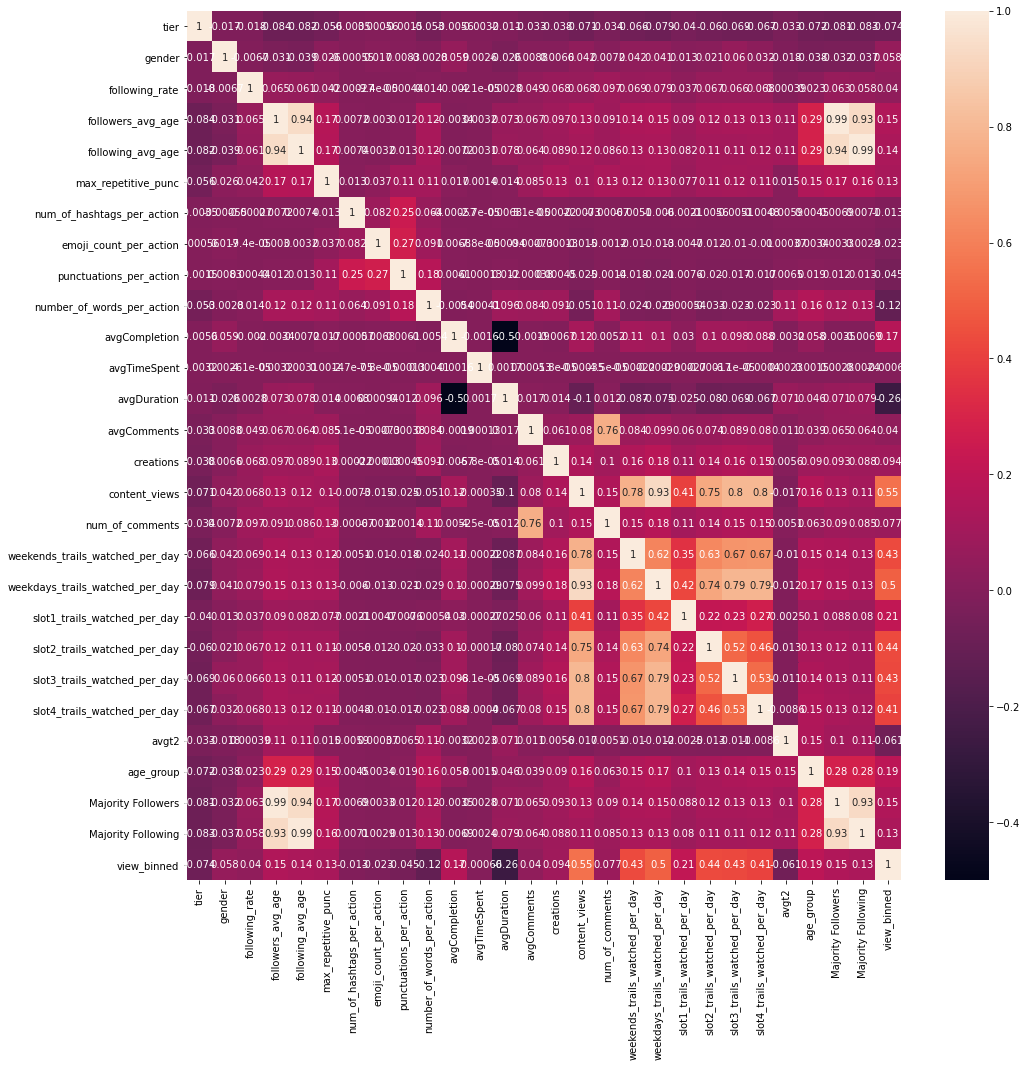

In [70]:
plt.figure(figsize = (16,16))
sns.heatmap(train.drop(['Unnamed: 0', 'userId'], axis = 1).corr(), annot = True)
plt.show()

In [81]:
X = train.drop(['Unnamed: 0', 'userId', 'age_group'], axis = 1)
Y = train['age_group']

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X,Y = sm.fit_resample(X,Y)

In [82]:
from sklearn.model_selection import train_test_split
X_Train, X_CV, Y_Train, Y_CV = train_test_split(X, Y, test_size = 0.15, random_state = 0)

In [ ]:
clf = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.25, n_jobs=8, objective = 'multiclassova')
clf.fit(X_Train, Y_Train, early_stopping_rounds = 200, eval_set = [(X_Train, Y_Train), (X_CV, Y_CV)], verbose = True)

[1]	training's multi_logloss: 1.17916	valid_1's multi_logloss: 1.17888
Training until validation scores don't improve for 200 rounds
[2]	training's multi_logloss: 1.08321	valid_1's multi_logloss: 1.08285
[3]	training's multi_logloss: 1.02465	valid_1's multi_logloss: 1.02423
[4]	training's multi_logloss: 0.984395	valid_1's multi_logloss: 0.984034
[5]	training's multi_logloss: 0.95389	valid_1's multi_logloss: 0.953532
[6]	training's multi_logloss: 0.932573	valid_1's multi_logloss: 0.932319
[7]	training's multi_logloss: 0.916041	valid_1's multi_logloss: 0.915928
[8]	training's multi_logloss: 0.903564	valid_1's multi_logloss: 0.903494
[9]	training's multi_logloss: 0.89354	valid_1's multi_logloss: 0.893614
[10]	training's multi_logloss: 0.885946	valid_1's multi_logloss: 0.886116
[11]	training's multi_logloss: 0.878266	valid_1's multi_logloss: 0.878659
[12]	training's multi_logloss: 0.872593	valid_1's multi_logloss: 0.873254
[13]	training's multi_logloss: 0.866095	valid_1's multi_logloss: 0.

[112]	training's multi_logloss: 0.785433	valid_1's multi_logloss: 0.800467
[113]	training's multi_logloss: 0.785074	valid_1's multi_logloss: 0.800266
[114]	training's multi_logloss: 0.78473	valid_1's multi_logloss: 0.800058
[115]	training's multi_logloss: 0.784378	valid_1's multi_logloss: 0.799856
[116]	training's multi_logloss: 0.784084	valid_1's multi_logloss: 0.799688
[117]	training's multi_logloss: 0.783821	valid_1's multi_logloss: 0.799562
[118]	training's multi_logloss: 0.783561	valid_1's multi_logloss: 0.799419
[119]	training's multi_logloss: 0.783198	valid_1's multi_logloss: 0.799186
[120]	training's multi_logloss: 0.782711	valid_1's multi_logloss: 0.798888
[121]	training's multi_logloss: 0.782409	valid_1's multi_logloss: 0.798723
[122]	training's multi_logloss: 0.78198	valid_1's multi_logloss: 0.798408
[123]	training's multi_logloss: 0.78167	valid_1's multi_logloss: 0.798221
[124]	training's multi_logloss: 0.78131	valid_1's multi_logloss: 0.79802
[125]	training's multi_logloss

[222]	training's multi_logloss: 0.754674	valid_1's multi_logloss: 0.784296
[223]	training's multi_logloss: 0.754392	valid_1's multi_logloss: 0.784118
[224]	training's multi_logloss: 0.754126	valid_1's multi_logloss: 0.783985
[225]	training's multi_logloss: 0.753884	valid_1's multi_logloss: 0.783906
[226]	training's multi_logloss: 0.753646	valid_1's multi_logloss: 0.783767
[227]	training's multi_logloss: 0.753382	valid_1's multi_logloss: 0.783648
[228]	training's multi_logloss: 0.75317	valid_1's multi_logloss: 0.783526
[229]	training's multi_logloss: 0.752979	valid_1's multi_logloss: 0.783433
[230]	training's multi_logloss: 0.752771	valid_1's multi_logloss: 0.783316
[231]	training's multi_logloss: 0.752597	valid_1's multi_logloss: 0.783232
[232]	training's multi_logloss: 0.752324	valid_1's multi_logloss: 0.783051
[233]	training's multi_logloss: 0.752111	valid_1's multi_logloss: 0.782965
[234]	training's multi_logloss: 0.751873	valid_1's multi_logloss: 0.782821
[235]	training's multi_log

[332]	training's multi_logloss: 0.729944	valid_1's multi_logloss: 0.772164
[333]	training's multi_logloss: 0.729741	valid_1's multi_logloss: 0.772067
[334]	training's multi_logloss: 0.729563	valid_1's multi_logloss: 0.771982
[335]	training's multi_logloss: 0.729275	valid_1's multi_logloss: 0.771857
[336]	training's multi_logloss: 0.729068	valid_1's multi_logloss: 0.771696
[337]	training's multi_logloss: 0.728853	valid_1's multi_logloss: 0.771587
[338]	training's multi_logloss: 0.728648	valid_1's multi_logloss: 0.771495
[339]	training's multi_logloss: 0.72847	valid_1's multi_logloss: 0.771382
[340]	training's multi_logloss: 0.728231	valid_1's multi_logloss: 0.771245
[341]	training's multi_logloss: 0.728031	valid_1's multi_logloss: 0.771207
[342]	training's multi_logloss: 0.727755	valid_1's multi_logloss: 0.771053
[343]	training's multi_logloss: 0.727549	valid_1's multi_logloss: 0.770967
[344]	training's multi_logloss: 0.727349	valid_1's multi_logloss: 0.770907
[345]	training's multi_log

[442]	training's multi_logloss: 0.707873	valid_1's multi_logloss: 0.76212
[443]	training's multi_logloss: 0.707733	valid_1's multi_logloss: 0.762048
[444]	training's multi_logloss: 0.707605	valid_1's multi_logloss: 0.761993
[445]	training's multi_logloss: 0.707453	valid_1's multi_logloss: 0.761905
[446]	training's multi_logloss: 0.707296	valid_1's multi_logloss: 0.761839
[447]	training's multi_logloss: 0.707083	valid_1's multi_logloss: 0.76173
[448]	training's multi_logloss: 0.706913	valid_1's multi_logloss: 0.761677
[449]	training's multi_logloss: 0.706669	valid_1's multi_logloss: 0.761585
[450]	training's multi_logloss: 0.706517	valid_1's multi_logloss: 0.761543
[451]	training's multi_logloss: 0.706302	valid_1's multi_logloss: 0.761463
[452]	training's multi_logloss: 0.706058	valid_1's multi_logloss: 0.761352
[453]	training's multi_logloss: 0.705903	valid_1's multi_logloss: 0.761295
[454]	training's multi_logloss: 0.705728	valid_1's multi_logloss: 0.761229
[455]	training's multi_logl

[552]	training's multi_logloss: 0.688014	valid_1's multi_logloss: 0.753511
[553]	training's multi_logloss: 0.687848	valid_1's multi_logloss: 0.753431
[554]	training's multi_logloss: 0.687725	valid_1's multi_logloss: 0.753388
[555]	training's multi_logloss: 0.687564	valid_1's multi_logloss: 0.753294
[556]	training's multi_logloss: 0.687396	valid_1's multi_logloss: 0.753225
[557]	training's multi_logloss: 0.687206	valid_1's multi_logloss: 0.753173
[558]	training's multi_logloss: 0.687021	valid_1's multi_logloss: 0.753041
[559]	training's multi_logloss: 0.686798	valid_1's multi_logloss: 0.752938
[560]	training's multi_logloss: 0.686665	valid_1's multi_logloss: 0.752903
[561]	training's multi_logloss: 0.686535	valid_1's multi_logloss: 0.752861
[562]	training's multi_logloss: 0.686323	valid_1's multi_logloss: 0.752771
[563]	training's multi_logloss: 0.686094	valid_1's multi_logloss: 0.752646
[564]	training's multi_logloss: 0.685983	valid_1's multi_logloss: 0.752595
[565]	training's multi_lo

[662]	training's multi_logloss: 0.670394	valid_1's multi_logloss: 0.745952
[663]	training's multi_logloss: 0.670264	valid_1's multi_logloss: 0.745908
[664]	training's multi_logloss: 0.670131	valid_1's multi_logloss: 0.745808
[665]	training's multi_logloss: 0.669992	valid_1's multi_logloss: 0.745745
[666]	training's multi_logloss: 0.669843	valid_1's multi_logloss: 0.74567
[667]	training's multi_logloss: 0.669685	valid_1's multi_logloss: 0.745581
[668]	training's multi_logloss: 0.669519	valid_1's multi_logloss: 0.745515
[669]	training's multi_logloss: 0.669385	valid_1's multi_logloss: 0.745485
[670]	training's multi_logloss: 0.669238	valid_1's multi_logloss: 0.745444
[671]	training's multi_logloss: 0.669063	valid_1's multi_logloss: 0.74537
[672]	training's multi_logloss: 0.66889	valid_1's multi_logloss: 0.745276
[673]	training's multi_logloss: 0.668716	valid_1's multi_logloss: 0.745195
[674]	training's multi_logloss: 0.668512	valid_1's multi_logloss: 0.74509
[675]	training's multi_loglos

[772]	training's multi_logloss: 0.653065	valid_1's multi_logloss: 0.739022
[773]	training's multi_logloss: 0.652902	valid_1's multi_logloss: 0.738956
[774]	training's multi_logloss: 0.65281	valid_1's multi_logloss: 0.73892
[775]	training's multi_logloss: 0.652755	valid_1's multi_logloss: 0.738882
[776]	training's multi_logloss: 0.652531	valid_1's multi_logloss: 0.738821
[777]	training's multi_logloss: 0.652389	valid_1's multi_logloss: 0.738778
[778]	training's multi_logloss: 0.652235	valid_1's multi_logloss: 0.738715
[779]	training's multi_logloss: 0.652109	valid_1's multi_logloss: 0.738643
[780]	training's multi_logloss: 0.65195	valid_1's multi_logloss: 0.738569
[781]	training's multi_logloss: 0.651785	valid_1's multi_logloss: 0.738458
[782]	training's multi_logloss: 0.65158	valid_1's multi_logloss: 0.738365
[783]	training's multi_logloss: 0.651407	valid_1's multi_logloss: 0.738244
[784]	training's multi_logloss: 0.651269	valid_1's multi_logloss: 0.738187
[785]	training's multi_loglos

[882]	training's multi_logloss: 0.637087	valid_1's multi_logloss: 0.732374
[883]	training's multi_logloss: 0.636945	valid_1's multi_logloss: 0.732318
[884]	training's multi_logloss: 0.6368	valid_1's multi_logloss: 0.732238
[885]	training's multi_logloss: 0.636679	valid_1's multi_logloss: 0.732197
[886]	training's multi_logloss: 0.636587	valid_1's multi_logloss: 0.732186
[887]	training's multi_logloss: 0.636489	valid_1's multi_logloss: 0.732178
[888]	training's multi_logloss: 0.636349	valid_1's multi_logloss: 0.732147
[889]	training's multi_logloss: 0.636161	valid_1's multi_logloss: 0.732077
[890]	training's multi_logloss: 0.636012	valid_1's multi_logloss: 0.73203
[891]	training's multi_logloss: 0.635853	valid_1's multi_logloss: 0.731975
[892]	training's multi_logloss: 0.635765	valid_1's multi_logloss: 0.731937
[893]	training's multi_logloss: 0.635598	valid_1's multi_logloss: 0.731863


In [ ]:
pred = clf.predict(X_CV)
print(f1_score(Y_CV, pred, average = 'weighted'))

In [80]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000,
                    learning_rate=0.17, n_jobs=8, objective = 'multiclassova')
xgb.fit(X_Train, Y_Train, early_stopping_rounds = 200, eval_set = [(X_Train, Y_Train), (X_CV, Y_CV)], verbose = True)

[0]	validation_0-merror:0.29528	validation_1-merror:0.29403
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 200 rounds.
[1]	validation_0-merror:0.29435	validation_1-merror:0.29369
[2]	validation_0-merror:0.29180	validation_1-merror:0.29128
[3]	validation_0-merror:0.28944	validation_1-merror:0.28935
[4]	validation_0-merror:0.28881	validation_1-merror:0.28927
[5]	validation_0-merror:0.28686	validation_1-merror:0.28719
[6]	validation_0-merror:0.28468	validation_1-merror:0.28566
[7]	validation_0-merror:0.28440	validation_1-merror:0.28578
[8]	validation_0-merror:0.28383	validation_1-merror:0.28528
[9]	validation_0-merror:0.28364	validation_1-merror:0.28496
[10]	validation_0-merror:0.28194	validation_1-merror:0.28266
[11]	validation_0-merror:0.28130	validation_1-merror:0.28224
[12]	validation_0-merror:0.28052	validation_1-merror:0.28211
[13]	validation_0-merror:0.27895	validation_1-merror:

[132]	validation_0-merror:0.22788	validation_1-merror:0.24840
[133]	validation_0-merror:0.22764	validation_1-merror:0.24824
[134]	validation_0-merror:0.22747	validation_1-merror:0.24829
[135]	validation_0-merror:0.22725	validation_1-merror:0.24836
[136]	validation_0-merror:0.22716	validation_1-merror:0.24831
[137]	validation_0-merror:0.22702	validation_1-merror:0.24817
[138]	validation_0-merror:0.22691	validation_1-merror:0.24839
[139]	validation_0-merror:0.22674	validation_1-merror:0.24844
[140]	validation_0-merror:0.22654	validation_1-merror:0.24844
[141]	validation_0-merror:0.22615	validation_1-merror:0.24849
[142]	validation_0-merror:0.22602	validation_1-merror:0.24866
[143]	validation_0-merror:0.22581	validation_1-merror:0.24855
[144]	validation_0-merror:0.22564	validation_1-merror:0.24854
[145]	validation_0-merror:0.22550	validation_1-merror:0.24839
[146]	validation_0-merror:0.22517	validation_1-merror:0.24842
[147]	validation_0-merror:0.22492	validation_1-merror:0.24839
[148]	va

KeyboardInterrupt: 

In [ ]:
pred = xgb.predict(X_CV)
print(f1_score(Y_CV, pred, average = 'weighted'))

In [ ]:
test_pred = clf.predict(test.drop(['Unnamed: 0', 'userId', 'age_group'], axis = 1))
test_pred = pd.DataFrame(test_pred, columns = ['prediction']).astype(int)

In [ ]:
test_pred.head()

In [ ]:
test_pred.to_csv('Preds/Submission8.csv', index = False)